When we build models and make predictions, all models tends to make some error. There is no model which can make prefect predictions. Then can we control these errors that models tend to make? To answer this, we need to understand the compositions of these errors that model make.

Prediction errors can be decomposed into two components called error due to bias and error due to variance. No model can minimize, both bias and variance. So while building models, we always have to trade-off between these two errors: bias and variance. Understanding these two types of errors are key to diagnosing model results and avoid building over- or under-fitting models.

What we will do in this tutorial is take a dataset and try creating underfitting and overfitting models and understand how errors change based on the complexity of the models and then how to find the optimal complexity of the model, where the error is minimized.

In [595]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sn
%matplotlib inline

In [27]:
dataFile="data/dengu_rain"
pdf = pd.read_csv(dataFile,sep=",",usecols=[0,1,2,3,4],names=['PLACE','YEAR','CASES','DEATH','RAINFALL'],header=0)

In [28]:
pdf[:50]

,PLACE,YEAR,CASES,DEATH,RAINFALL
0,Chattisgarh,2013,83,2,1418.4
1,Himachal P,2013,89,2,1217.1
2,Jharkhand,2013,161,0,1253.5
3,Karnataka,2013,6408,12,5878.7
4,Kerala,2013,7938,29,3255.5
5,Maharashtra,2013,5610,48,3370.0
6,Punjab,2013,4117,25,586.6
7,Rajasthan,2013,4413,10,1224.0
8,Telangana,2013,0,0,1272.0
9,Arunachal P,2014,27,0,2933.7


In [31]:
pdf = pd.read_csv(dataFile,sep=",",usecols=[2,4],names=['CASES','RAINFALL'],header=0)

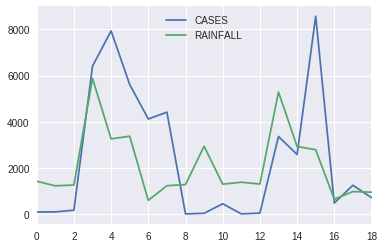

In [32]:
pdf.plot()

## Generate some dummy data

In [135]:
l1=[1.2, 1.4, 1.5, 2.0, 1.3, 1.4, 2.5, 3.0, 1.3, 1.8]
l1
np1 = np.array([l1])
np1

array([[ 1.2,  1.4,  1.5,  2. ,  1.3,  1.4,  2.5,  3. ,  1.3,  1.8]])

In [136]:
np2 = np1**2
l2=np2.tolist()
np2

array([[ 1.44,  1.96,  2.25,  4.  ,  1.69,  1.96,  6.25,  9.  ,  1.69,
         3.24]])

In [166]:
nnp = np.concatenate((np1,np2),axis=1)

In [146]:
nnp =nnp.T

In [167]:
nnp

array([[ 1.2 ,  1.4 ,  1.5 ,  2.  ,  1.3 ,  1.4 ,  2.5 ,  3.  ,  1.3 ,
         1.8 ,  1.44,  1.96,  2.25,  4.  ,  1.69,  1.96,  6.25,  9.  ,
         1.69,  3.24]])

In [151]:
to_df = pd.DataFrame(nnp,columns=['rain','sales'])

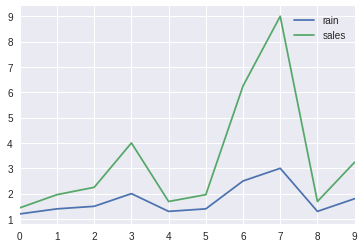

In [152]:
to_df.plot()

In [490]:
def generate_tetansq(lst):
    np1 = np.array([lst])
    np2 = (np1+3)**2
    l2=np2.tolist()
    nnp = np.concatenate((np1,np2),axis=0)
    nnp =nnp.T
    to_df = pd.DataFrame(nnp,columns=['rain','sales'])
    #to_df= to_df.sort_values('rain')
    return to_df

In [562]:
pdf = generate_tetansq([1,2,3,4,5,6,7,8,9,10,1.9,3.5,4.5,2.5,6.6,12,14,15,16,20,12.5,14.3,5.5,6.2,7.2,8.2,9.2,10])

In [563]:
#pdf = generate_tetansq([2,3,3.5,4,5,9,10,22,24])

In [564]:
pdf

,rain,sales
0,1.0,16.00
1,2.0,25.00
2,3.0,36.00
3,4.0,49.00
4,5.0,64.00
5,6.0,81.00
6,7.0,100.00
7,8.0,121.00
8,9.0,144.00
9,10.0,169.00


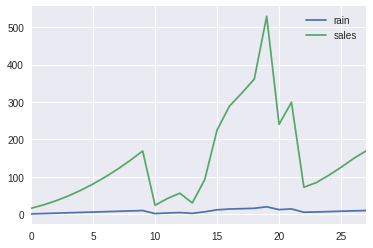

In [565]:
pdf.plot()

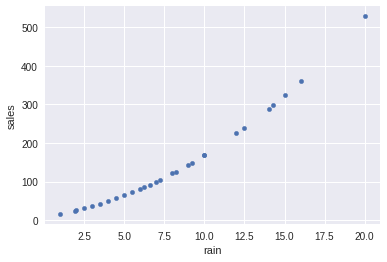

In [566]:
pdf.plot.scatter('rain','sales')

In [567]:
pdf.head

<bound method NDFrame.head of     rain   sales
0    1.0   16.00
1    2.0   25.00
2    3.0   36.00
3    4.0   49.00
4    5.0   64.00
5    6.0   81.00
6    7.0  100.00
7    8.0  121.00
8    9.0  144.00
9   10.0  169.00
10   1.9   24.01
11   3.5   42.25
12   4.5   56.25
13   2.5   30.25
14   6.6   92.16
15  12.0  225.00
16  14.0  289.00
17  15.0  324.00
18  16.0  361.00
19  20.0  529.00
20  12.5  240.25
21  14.3  299.29
22   5.5   72.25
23   6.2   84.64
24   7.2  104.04
25   8.2  125.44
26   9.2  148.84
27  10.0  169.00>

In [605]:
def fit_poly( degree ):
    p = np.polyfit( pdf.rain, pdf.sales, deg = degree )
    pdf['fit'] = np.polyval( p, pdf.rain )# add anew column, fiited data
    sn.regplot( pdf.rain, pdf.sales, fit_reg = False )
    return plt.plot( pdf.rain, pdf.fit, label='fit' )

In [606]:
#help(np.polyfit)
#pdf

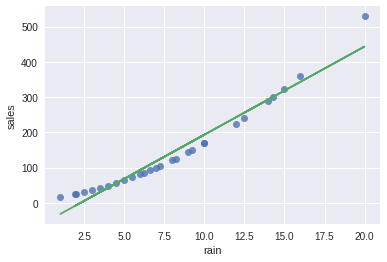

In [607]:
fit_poly(1)

In [571]:
pdf[:10]

,rain,sales,fit
0,1.0,16.0,-31.349244
1,2.0,25.0,-6.364803
2,3.0,36.0,18.619637
3,4.0,49.0,43.604078
4,5.0,64.0,68.588519
5,6.0,81.0,93.572960
6,7.0,100.0,118.557401
7,8.0,121.0,143.541841
8,9.0,144.0,168.526282
9,10.0,169.0,193.510723


The regression line does not seem to fit the data. The model assumes that relationship between y and x is linear. These models are called high-bias models. High bias models assume simplicity in relationship and do not explain variance in the data well. Even if the sample changes, the parameters estimated by the models hardly respond. The model parameters are least sensitive to any changes in the sample

In [574]:
#Fit a regression with polynomial features
#Let's bring in a polynomial feature, which is square of the feature x
# y=β1 x1 + β2 x1 ^2 +εi
pdf

,rain,sales,fit
0,1.0,16.00,16.00
1,2.0,25.00,25.00
2,3.0,36.00,36.00
3,4.0,49.00,49.00
4,5.0,64.00,64.00
5,6.0,81.00,81.00
6,7.0,100.00,100.00
7,8.0,121.00,121.00
8,9.0,144.00,144.00
9,10.0,169.00,169.00


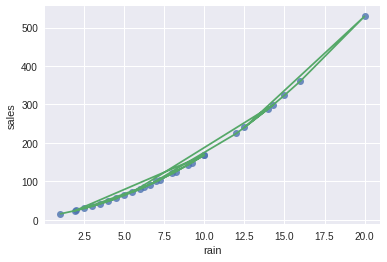

In [578]:
fit_poly(2)

This regression line seems to fit data better than the previous model. But can we better this model by adding more polynomial features of higher order.

In [560]:
#Building higher polynomial models
#  y=β1 x1 + β2 x1^2 + β2 x1^3 + β2 x1^4 + β2 x1^5+εi

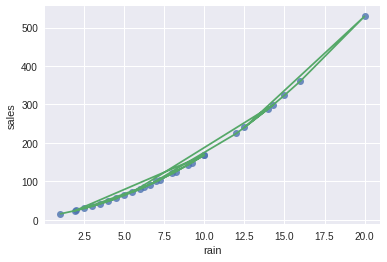

In [577]:
fit_poly(5)

In [625]:
# NICE POLYNOMIAL DATA
nasdaqFile = 'DATA_EXL/NASDAQ.csv'
spFile = 'DATA_EXL/S&P_500.csv'
googFile = 'DATA_EXL/GOOG.csv'
oilFile = 'DATA_EXL/USO.csv'
xomFile = 'DATA_EXL/XOM.csv'

In [626]:
pdfstk = pd.read_csv(googFile,sep=",",usecols=[1,6],names=['rain','sales'],header=0)

In [627]:
pdfstk[:3]

,rain,sales
0,378.107758,144134100
1,338.481293,93706000
2,349.808838,83701600


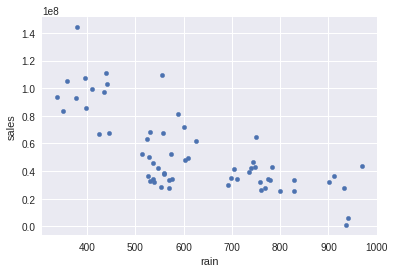

In [628]:
pdfstk.plot.scatter('rain','sales')

In [629]:
def fit_poly( degree ):
    p = np.polyfit( pdfstk.rain, pdfstk.sales, deg = degree )
    pdfstk['fit'] = np.polyval( p, pdfstk.rain )# add anew column, fiited data
    sn.regplot( pdfstk.rain, pdfstk.sales, fit_reg = False )
    return plt.plot( pdfstk.rain, pdfstk.fit, label='fit' )

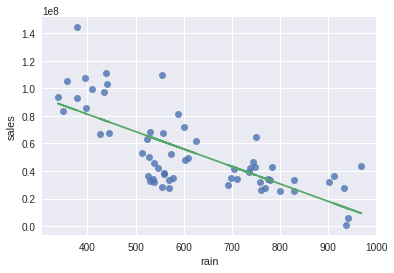

In [630]:
fit_poly(1)

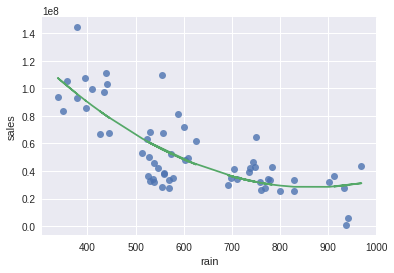

In [631]:
fit_poly(2)

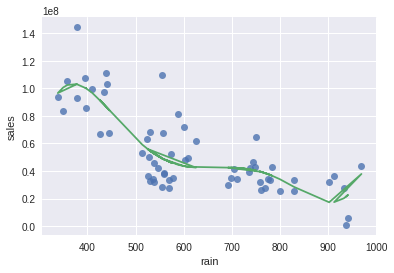

In [632]:
fit_poly(5)

As we continue to build higher polynomial models, we realize that the model has started to fit the training data really well. This can be a case of overfitting. These kind of models are called high variance models. These models are very sensitive to the training data i.e. the model parameters estimated are very sensitive to the data points. Any change i.e. addition and removel of data points can alter these models parameters significantly. High variance models tends to overfit the dataset and do not generalize well.

In statistics and machine learning, the bias–variance tradeoff (or dilemma) is the problem of simultaneously minimizing two sources of error that prevent supervised learning algorithms from generalizing beyond their training set:[citation needed]

    The bias is error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).
    The variance is error from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting).


## Deciding the complexity of the model

Then how do we know what is the optimal complexity of a model should be? To understand that we should split our dataset into train and test, and then build models with increasing complexity to monitor the cases of underfitting and overfitting. If the model can neither fit both training and test dataset, then it is a high biased model (a case underfitting). If the model fit training dataset well but performs poorly on test dataset, then it is a high variance model (a case of overfitting). There should be models with intermediate complexity that would explain training as well as test datasets well. And that sould be the optimal complexity of the model.


In [633]:
from sklearn import metrics
from sklearn.cross_validation import train_test_split

/home/vijay/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [634]:
def get_rmse( y, y_fit ):
    return np.sqrt(metrics.mean_squared_error( y, y_fit ))

In [644]:
train_X, test_X, train_y, test_y = train_test_split( pdfstk.rain,
                                                  pdfstk.sales,
                                                  test_size = 0.40,
                                                  random_state = 100 )

,degree,rmse_train,rmse_test


In [648]:
rmse_df = pd.DataFrame(columns = ["degree", "rmse_train", "rmse_test"])

for i in range( 1, 15 ):
    p = np.polyfit( train_X, train_y, deg = i )
    rmse_df.loc[i-1] = [ i,
                      get_rmse( train_y, np.polyval( p, train_X ) ),
                      get_rmse( test_y, np.polyval( p, test_X ) ) ]

/home/vijay/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.


In [649]:
rmse_df[:10]

,degree,rmse_train,rmse_test
0,1.0,1.810563e+07,2.225865e+07
1,2.0,1.746202e+07,1.984192e+07
2,3.0,1.715090e+07,1.981686e+07
3,4.0,1.677262e+07,2.066863e+07
4,5.0,1.659801e+07,1.820334e+07
5,6.0,1.591794e+07,2.299087e+07
6,7.0,1.588966e+07,2.533212e+07
7,8.0,1.558521e+07,1.758954e+07
8,9.0,1.522491e+07,5.672866e+07
9,10.0,1.515478e+07,8.062706e+07


In [650]:
#Plot both train and test errors agaist model complexity

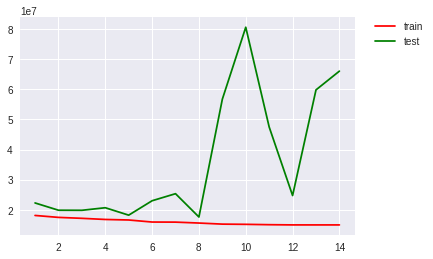

In [651]:


plt.plot( rmse_df.degree,
       rmse_df.rmse_train,
       label='train',
       color = 'r' )

plt.plot( rmse_df.degree,
       rmse_df.rmse_test,
       label='test',
       color = 'g' )

plt.legend(bbox_to_anchor=(1.05, 1),
         loc=2,
         borderaxespad=0.)



It can be observed, as model complexity increases, the model begins to fit training and test data. But beyond a certain point of model complexity, even though the training error reduces, the test error starts to swell. This is the point(in the example it is 5), below which the model underfits and beyond which the model overfits the data. So, this is the point of Optimal model complexity. In this example, the optimal complexity is 5.

In the next blog posts, we will discuss some advanced concepts like how to bring down the variance of models with higher complexity using ensemble methods.

In [666]:
#ADDING VALUES TO AN EMPTY DATAFRAME
test_df = pd.DataFrame(columns = ["degree", "rmse_train", "rmse_test"])

In [ ]:
test_df.loc[i

In [662]:
for i in range(5,0,-1):
    degree=i
    rmse_train = i/3.5
    rmse_test = i/3.2
    test_df.loc[i+1] = degree,rmse_train,rmse_test
test_df

,degree,rmse_train,rmse_test
6,5.0,1.428571,1.5625
5,4.0,1.142857,1.2500
4,3.0,0.857143,0.9375
3,2.0,0.571429,0.6250
2,1.0,0.285714,0.3125


In [665]:
test_df.loc?